> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# Homework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problems [Part 1](./01_Catch_Motion.md)

1. Instead of using $\frac{\Delta v}{\Delta t}$, you can use the [numpy polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to determine the acceleration of the ball. 

    a. Use your coordinates from the saved .npz file you used above to load your projectile motion data
    
    ````python
    npz_coords = np.load('projectile_coords.npz')
    t = npz_coords['t']
    x = npz_coords['x']
    y = npz_coords['y']
    ````
    
    b. Calculate $v_x$ and $v_y$ using a finite difference again, then do a first-order polyfit to $v_x-$ and $v_y-$ vs $t$. What is the acceleration now?
    
    c. Now, use a second-order polynomial fit for x- and y- vs t. What is acceleration now?
    
    d. Plot the polyfit lines for velocity and position (2 figures) with the finite difference velocity data points and positions. Which lines look like better e.g. which line fits the data?

In [2]:
# 1.1A
npz_coords = np.load('../data/projectile_coords.npz')
t = npz_coords['t']
x = npz_coords['x']
y = npz_coords['y']

The acceleration in the y direction is: -11.65
The acceleration in the x direction is: 0.00
The best fit acceleration in the y direction is: -9.48
The best fit acceleration in the x direction is: -0.28


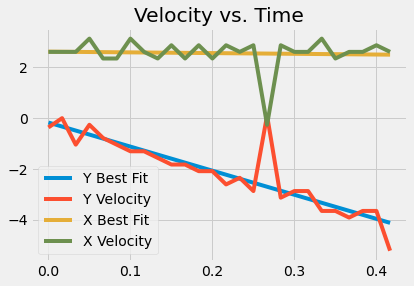

In [3]:
# 1.1B
delta_y = (y[1:] - y[0:-1])
vy = delta_y * 60
ay = (vy[1:] - vy[:-1]) * 60

delta_x = (x[1:] - x[0:-1])
vx = delta_x * 60
ax = (vx[1:] - vx[:-1]) * 60

print('The acceleration in the y direction is: {:.2f}'.format(ay.mean()))
print('The acceleration in the x direction is: {:.2f}'.format(ax.mean()))

vy_fit1 = np.polyfit(t[:-1],vy,1)
vx_fit1 = np.polyfit(t[:-1],vx,1)

plt.plot(t[:-1],np.polyval(vy_fit1,t[:-1]), label='Y Best Fit')
plt.plot(t[:-1],vy, label='Y Velocity')
plt.plot(t[:-1],np.polyval(vx_fit1,t[:-1]), label='X Best Fit')
plt.plot(t[:-1],vx, label='X Velocity')
plt.title('Velocity vs. Time')
plt.legend(loc='best');

print('The best fit acceleration in the y direction is: {:.2f}'.format(vy_fit1[0]))
print('The best fit acceleration in the x direction is: {:.2f}'.format(vx_fit1[0]))

The best fit acceleration in the y direction is: -9.48 m/s^2


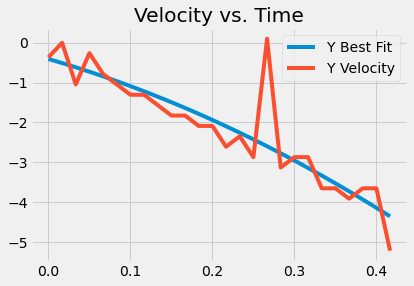

In [4]:
# 1.1C
vy_fit2 = np.polyfit(t[:-1],vy,2)
vx_fit2 = np.polyfit(t[:-1],vx,2)

vy_val2 = np.polyval(vy_fit2, t[:-1])

delta_y2 = (vy_val2[1:] - vy_val2[0:-1])
ay2 = delta_y2 * 60

plt.plot(t[:-1], vy_val2, label='Y Best Fit')
plt.plot(t[:-1],vy, label='Y Velocity')
plt.title('Velocity vs. Time')
plt.legend(loc='best');

print('The best fit acceleration in the y direction is: {:.2f} m/s^2'.format(ay2.mean()))

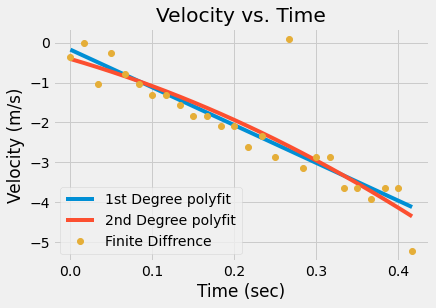

In [5]:
# 1.1D Plot the polyfit lines for velocity and position (2 figures) with the finite difference velocity data points and 
# positions. Which lines look like better e.g. which line fits the data?

# polyfit 1 and 2 velocity and finite diffrence velocity (y direction)
plt.plot(t[:-1],np.polyval(vy_fit1,t[:-1]), label='1st Degree polyfit')
plt.plot(t[:-1], vy_val2, label='2nd Degree polyfit')
plt.plot(t[:-1],vy, 'o', label='Finite Diffrence')
plt.legend(loc='best')
plt.title('Velocity vs. Time')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)');

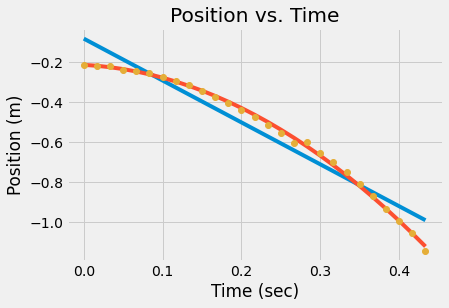

In [6]:
# polyfit 1 and 2 position and finite diffrence position (y direction)

yPosFit1 = np.polyfit(t,y,1) # first degree best fit for y posiiton 
yPosFit2 = np.polyfit(t,y,2) # second degree best fit for y posiiton 

plt.plot(t, np.polyval(yPosFit1, t), label= '1st Degree polyfit')
plt.plot(t, np.polyval(yPosFit2, t), label= '2nd Degree polyfit')
plt.plot(t, y, 'o', label='Picked Data')
plt.title('Position vs. Time')
plt.xlabel('Time (sec)')
plt.ylabel('Position (m)');

In both cases, the second degree fit line best matches the data

2. Not only can you measure acceleration of objects that you track, you can look at other physical constants like [coefficient of restitution](https://en.wikipedia.org/wiki/Coefficient_of_restitution), $e$ . 

     During a collision with the ground, the coefficient of restitution is
     
     $e = -\frac{v_{y}'}{v_{y}}$ . 
     
     Where $v_y'$ is y-velocity perpendicular to the ground after impact and $v_y$ is the y-velocity after impact. 
     
     a. Calculate $v_y$ and plot as a function of time from the data `'../data/fallingtennisball02.txt'`
     
     b. Find the locations when $v_y$ changes rapidly i.e. the impact locations. Get the maximum and minimum velocities closest to the impact location. _Hint: this can be a little tricky. Try slicing the data to include one collision at a time before using  the `np.min` and `np.max` commands._
     
     c. Calculate the $e$ for each of the three collisions

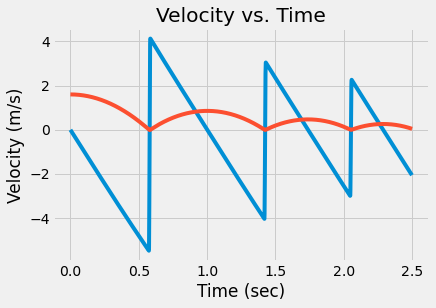

In [7]:
# 1.2A

filename = '../data/fallingtennisball02.txt'
t, y = np.loadtxt(filename, usecols=[0,1], unpack=True) # Load data
poop = np.transpose(np.loadtxt(filename, usecols=[0,1], unpack=True))


delta_y = (y[1:] - y[0:-1])
vy = delta_y/(t[1:]-t[0:-1])

plt.plot(t[:-1], vy,  label='Y Velocity')
plt.plot(t,y)
plt.title('Velocity vs. Time')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)');

Minimum values: [-5.48599715 -4.04205731 -2.99900599]
Maximum values: [4.12984813 3.04666524 2.26201087]
Coef. Restitution:  0.7535976150525817


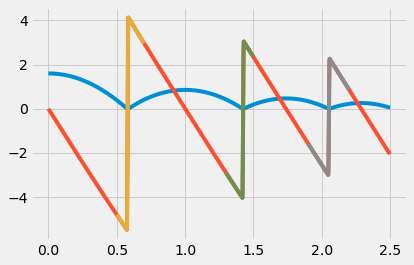

In [8]:
# 1.2B

# Put t and vy in 1 array  
tvy= np.zeros((len(t[:-1]),2))
tvy[:,0] = t[:-1]
tvy[:,1] = vy

# Define wheere I want to slice data 
slicer= np.zeros((3,2))
slicer[0,:] = (0.5,0.7)
slicer[1,:] = (1.3, 1.5)
slicer[2,:] = (1.9, 2.2)


# Practice 
tibble = poop[np.logical_and(poop[:,0]>slicer[0,0],poop[:,0]<slicer[0,1])]
plt.plot(poop[:,0], poop[:,1])
# plt.plot(tibble[:,0], tibble[:,1])
plt.plot(tvy[:,0], tvy[:,1])

# finding max and min values in each slice range 
i=0
MinMax = np.zeros((len(slicer),2))
while i<len(slicer):
    tivvle = tvy[np.logical_and(tvy[:,0]>slicer[i,0],tvy[:,0]<slicer[i,1])] # Create var with sliced array
    plt.plot(tivvle[:,0], tivvle[:,1])
    k = 0
    while k<=1:
        if k==1:
            MinMax[i,k] = np.max(tivvle[:,1]) # fill array with max value in slice range
        else:
            MinMax[i,k] = np.min(tivvle[:,1]) # fill array with min value in slice range 
        k=k+1
    i=i+1

del i
del k
print('Minimum values:', MinMax[:,0])
print('Maximum values:', MinMax[:,1])

# 1.2C Calculate the  𝑒  for each of the three collisions
e= -MinMax[:,1]/MinMax[:,0]
print('Coef. Restitution: ', e.mean())

## Problems [Part 2](./02_Step_Future.md)

1. Integrate the `fall_drag` equations for a tennis ball and a [lacrosse ball](https://en.wikipedia.org/wiki/Lacrosse_ball) with the same initial conditions as above. Plot the resulting height vs time. 

_Given:_ y(0) = 1.6 m, v(0) = 0 m/s

|ball| diameter | mass|
|---|---|---|
|tennis| $6.54$–$6.86 \rm{cm}$ |$56.0$–$59.4 \rm{g}$|
|lacrosse| $6.27$–$6.47 \rm{cm}$ |$140$–$147 \rm{g}$|

Is there a difference in the two solutions? At what times do the tennis ball and lacrosse balls reach the ground? Which was first?

In [9]:
def fall_dragTB(state,C_d=0.47,m=0.0577,R = 0.0661/2):
    '''Computes the right-hand side of the differential equation
    for the fall of a ball, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of two dependent variables [y v]^T
    m : mass in kilograms default set to 0.0577 kg
    C_d : drag coefficient for a sphere default set to 0.47 (no units)
    R : radius of ball default in meters is 0.0661/2 m (tennis ball)
    Returns
    -------
    derivs: array of two derivatives [v (-g+a_drag)]^T
    '''
    
    rho = 1.22   # air density kg/m^3
    pi = np.pi
    
    a_drag = -1/(2*m) * pi * R**2 * rho * C_d * (state[1])**2*np.sign(state[1])
    
    derivs = np.array([state[1], -9.8 + a_drag])
    return derivs

In [10]:
def fall_dragLB(state,C_d=0.47,m=np.mean((0.140,0.147)),R = np.mean((0.0627,0.0647))/2):
    '''Computes the right-hand side of the differential equation
    for the fall of a ball, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of two dependent variables [y v]^T
    m : mass in kilograms default set to 0.0577 kg
    C_d : drag coefficient for a sphere default set to 0.47 (no units)
    R : radius of ball default in meters is 0.0661/2 m (tennis ball)
    Returns
    -------
    derivs: array of two derivatives [v (-g+a_drag)]^T
    '''
    
    rho = 1.22   # air density kg/m^3
    pi = np.pi
    
    a_drag = -1/(2*m) * pi * R**2 * rho * C_d * (state[1])**2*np.sign(state[1])
    
    derivs = np.array([state[1], -9.8 + a_drag])
    return derivs

In [11]:
def eulerstep(state, rhs, dt):
    '''Uses Euler's method to update a state to the next one. 
    
    Arguments
    ---------
    state: array of two dependent variables [y v]^T
    rhs  : function that computes the right hand side of the 
           differential equation.
    dt   : float, time increment. 
    
    Returns
    -------
    next_state: array, updated state after one time increment.       
    '''
    
    next_state = state + rhs(state) * dt
    return next_state

Lacrosse ball hits at:  0.572972972972973 s
Tennis ball hits at:  0.572972972972973 s
time diff:  0.0


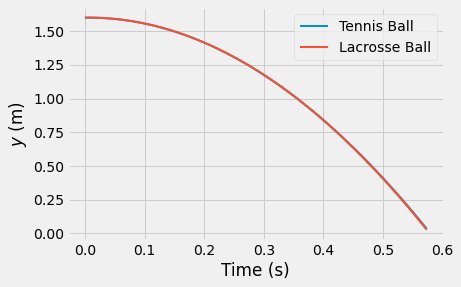

In [12]:
N = 556   #number of steps
t=np.linspace(0,6,N) # set values for time (our independent variable)

#time increment
dt = t[1]-t[0]

y0 = 1.6 #initial position
v0 = 0    #initial velocity


#initialize array
num_sol_dragTB = np.zeros([N,2])
num_sol_dragLB = np.zeros([N,2])
#Set intial conditions
num_sol_dragTB[0,0] = y0
num_sol_dragTB[0,1] = v0

num_sol_dragLB[0,0] = y0
num_sol_dragLB[0,1] = v0

for i in range(N-1):
    num_sol_dragTB[i+1] = eulerstep(num_sol_dragTB[i], fall_dragTB, dt)
    
for i in range(N-1):
    num_sol_dragLB[i+1] = eulerstep(num_sol_dragLB[i], fall_dragLB, dt)
    
# Ground hit time
TBpos = np.zeros((N,2))
TBpos[:,1] = num_sol_dragTB[:,0]
TBpos[:,0] = t[:N]
TBpos = TBpos[TBpos[:,1]>=0]

LBpos = np.zeros((N,2))
LBpos[:,1] = num_sol_dragLB[:,0]
LBpos[:,0] = t[:N]
LBpos = LBpos[LBpos[:,1]>=0]

groundHit = np.zeros(2)
groundHit[0] = np.max(TBpos[:,0])
groundHit[1] = np.max(LBpos[:,0])

plt.plot(TBpos[:,0], TBpos[:,1], linewidth=2,  label='Tennis Ball')
plt.plot(LBpos[:,0], LBpos[:,1], linewidth=2,  label='Lacrosse Ball')
plt.xlabel('Time (s)')
plt.legend(loc='best')
plt.ylabel('$y$ (m)');

print('Lacrosse ball hits at: ' ,groundHit[1], 's')
print('Tennis ball hits at: ' ,groundHit[0],'s')
print('time diff: ', np.abs(groundHit[1]-groundHit[0]))

![Projectile motion with drag](../images/projectile.png)

The figure above shows the forces acting on a projectile object, like the [lacrosse ball](https://en.wikipedia.org/wiki/Lacrosse_ball) from [Flipping Physics](http://www.flippingphysics.com) that you analyzed in [lesson 01_Catch_Motion](./01_Catch_Motion.ipynb). Consider the 2D motion of the [lacrosse ball](https://en.wikipedia.org/wiki/Lacrosse_ball), now the state vector has two extra variables, 

$
\mathbf{y} = \begin{bmatrix}
x \\ v_x \\
y \\ v_y 
\end{bmatrix},
$

and its derivative is now, 

$\dot{\mathbf{y}} = \begin{bmatrix}
v_x \\ -c v_x^2 \\
v_y \\ g - cv_y^2 
\end{bmatrix},$ 

where $c= \frac{1}{2} \pi R^2 \rho C_d$.

## Problems [Part 3](./03_Get_Oscillations.md)

1. Show that the implicit Heun's method has the same second order convergence as the Modified Euler's method. _Hint: you can use the same code from above to create the log-log plot to get the error between $2\cos(\omega t)$ and the `heun_step` integration. Use the same initial conditions x(0) = 2 m and v(0)=0m/s and the same RHS function, `springmass`._

In [13]:
def heun_step(state,rhs,dt,etol=0.000001,maxiters = 100):
    '''Update a state to the next time increment using the implicit Heun's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    etol  : tolerance in error for each time step corrector
    maxiters: maximum number of iterations each time step can take
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    e=1
    eps=np.finfo('float64').eps
    next_state = state + rhs(state)*dt
    ################### New iterative correction #########################
    for n in range(0,maxiters):
        next_state_old = next_state
        next_state = state + (rhs(state)+rhs(next_state))/2*dt
        e=np.sum(np.abs(next_state-next_state_old)/np.abs(next_state+eps))
        if e<etol:
            break
    ############### end of iterative correction #########################
    return next_state

def rk2_step(state, rhs, dt):
    '''Update a state to the next time increment using modified Euler's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    
    mid_state = state + rhs(state) * dt*0.5    
    next_state = state + rhs(mid_state)*dt
 
    return next_state

def get_error(num_sol, T, x_0= 2):
    
    x_an = x0 * np.cos(w * T) # analytical solution at final time
    
    error =  np.abs(num_sol[-1,0] - x_an)
    
    return error

def springmass(state):
    '''Computes the right-hand side of the spring-mass differential 
    equation, without friction.
    
    Arguments
    ---------   
    state : array of two dependent variables [x v]^T
    
    Returns 
    -------
    derivs: array of two derivatives [v - w*w*x]^T
    '''
    
    derivs = np.array([state[1], -w**2*state[0]])
    return derivs

The number of time steps is 160000.
The time increment is 0.015707963267948967


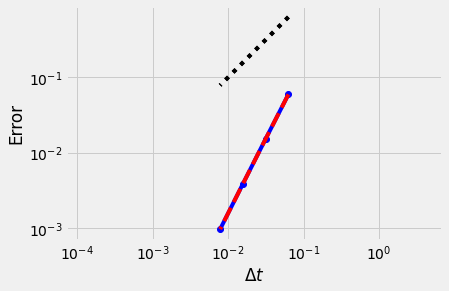

In [14]:
w = 2
period = 2*np.pi/w
dt = period/200  # time intervals per period 
T = 800*period   # simulation time, in number of periods
N = round(T/dt)

print('The number of time steps is {}.'.format( N ))
print('The time increment is {}'.format( dt ))

# time array
t = np.linspace(0, T, N)

x0 = 2    # initial position
v0 = 0    # initial velocity

#initialize solution array
num_heun = np.zeros([N,2])
num_rk2 = np.zeros([N,2])

#Set intial conditions
num_heun[0,0] = x0
num_heun[0,1] = v0
num_rk2[0,0] = x0
num_rk2[0,1] = v0

dt_values = np.array([period/50, period/100, period/200, period/400])
T = 1*period



num_heun_time = np.empty_like(dt_values, dtype=np.ndarray)
num_rk2_time = np.empty_like(dt_values, dtype=np.ndarray)


for j, dt in enumerate(dt_values):

    N = int(T/dt)
    t = np.linspace(0, T, N)
    
    #initialize solution array
    num_heun = np.zeros([N,2])
    num_rk2 = np.zeros([N,2])
    
    
    #Set intial conditions
    num_heun[0,0] = x0
    num_heun[0,1] = v0
    num_rk2[0,0] = x0
    num_rk2[0,1] = v0
    
    for i in range(N-1):
        num_rk2[i+1] = rk2_step(num_heun[i], springmass, dt)
        num_heun[i+1] = heun_step(num_rk2[i], springmass, dt)

    num_heun_time[j] = num_heun.copy()
    num_rk2_time[j] = num_rk2.copy()

for i in range(N-1):
    num_heun[i+1] = heun_step(num_heun[i], springmass, dt)
    num_rk2[i+1] = rk2_step(num_rk2[i], springmass, dt)
    
error_values_huen = np.zeros(len(dt_values))
error_values_rk2 = np.zeros(len(dt_values))

for j in range(len(dt_values)):    
    error_values_huen[j] = get_error(num_heun_time[j], T)
    error_values_rk2[j] = get_error(num_rk2_time[j], T)
    
# plot
plt.loglog(dt_values, error_values_huen, 'o-', color='blue')
plt.loglog(dt_values, 10*dt_values, 'k:')
plt.loglog(dt_values, error_values_rk2, '--',color='red')
plt.loglog(dt_values, 10*dt_values, 'k:')
plt.grid(True)
plt.axis('equal')
plt.xlabel('$\Delta t$')
plt.ylabel('Error');

Since the 2 error plots on on top of each other, both Heun's method and the Modified Euler's method have the same second order convergence 

<img src="../images/damped-spring.png" style="width: 400px;"/>

2. In the image above, you have a spring, mass, _and damper_. A damper is designed to slow down a moving object. These devices are typical in automobiles, mountain bikes, doors, any place where oscillations may not be desired, but motion is required. The new differential equation, if F(t)=0, that results from this addition is

$\ddot{x} = -\frac{b}{m}\dot{x} -\frac{k}{m}x$

or keeping our _natural frequency_ above, 

$\ddot{x} = -\zeta\omega\dot{x} -\omega^2x$

where $\zeta$ is a new constant called the __damping ratio__ of a system. When $\zeta\gt 1$, there are no oscillations and when $0<\zeta<1$ the system oscillates, but decays to v=0 m/s eventually. 

Create the system of equations that returns the right hand side (RHS) of the state equations, e.g. $\mathbf{\dot{y}} = f(\mathbf{y}) = RHS$

Use $\omega = 2$ rad/s and $\zeta = 0.2$.

In [15]:
def smd(state, w=2, zeta= 0.2):
    '''Computes the right-hand side of the spring-mass-damper
    differential equation, without friction.
    
    Arguments
    ---------   
    state : array of two dependent variables [x, v]^T
    
    Returns 
    -------
    derivs: array of two derivatives [v, -zeta*w*v - w*w*x]^T
    '''
    derivs = np.zeros(len(state))
    derivs[0] = state[1]
    derivs[1] = -zeta*w*state[1]-w**2-state[0]
    
    return derivs

3. Use three methods to integrate your `smd` function for 3 time periods of oscillation and initial conditions x(0)=2 m and v(0)=0 m/s. Plot the three solutions on one graph with labels. 

a. Euler integration

b. second order Runge Kutta method (modified Euler method)

c. the implicit Heun's method

How many time steps does each method need to converge to the same results? _Remember that each method has a certain convergence rate_

In [16]:
# 3.3A Euler 
def eulerstep(state, rhs, dt):
    '''Update a state to the next time increment using Euler's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    
    next_state = state + rhs(state) * dt
    return next_state

In [17]:
# 3.3A modified Euler method 
def rk2_step(state, rhs, dt):
    '''Update a state to the next time increment using modified Euler's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    
    mid_state = state + rhs(state) * dt*0.5    
    next_state = state + rhs(mid_state)*dt
 
    return next_state

In [18]:
# 3.3A Heun 
def heun_step(state,rhs,dt,etol=0.000001,maxiters = 100):
    '''Update a state to the next time increment using the implicit Heun's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    etol  : tolerance in error for each time step corrector
    maxiters: maximum number of iterations each time step can take
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    e=1
    eps=np.finfo('float64').eps
    next_state = state + rhs(state)*dt
    ################### New iterative correction #########################
    for n in range(0,maxiters):
        next_state_old = next_state
        next_state = state + (rhs(state)+rhs(next_state))/2*dt
        e=np.sum(np.abs(next_state-next_state_old)/np.abs(next_state+eps))
        if e<etol:
            break
    ############### end of iterative correction #########################
    return next_state

In [19]:
w = 2
period = 2*np.pi/w
dt = period/20  # you choose 20 time intervals per period 
dtee=dt
T = 10*period    # solve for 3 periods
N = round(T/dt)
t = np.linspace(0, T, N)
x0 = 2    # initial position
v0 = 0    # initial velocity
#initialize solution array
num_solEUL = np.zeros([N,2])

#Set intial conditions
num_solEUL[0,0] = x0
num_solEUL[0,1] = v0

# Euler
for i in range(N-1):
    num_solEUL[i+1] = eulerstep(num_solEUL[i], smd, dt)
    
# modified Euler method
dt_values = np.array([period/50, period/100, period/200,period/400,period/1000])
Tee = 10*period

num_RK2_time = np.empty_like(dt_values, dtype=np.ndarray)


for j, dtee in enumerate(dt_values):

    N = int(Tee/dtee)
    tee = np.linspace(0, Tee, N)
    
    #initialize solution array
    num_solRK2 = np.zeros([N,2])
    
    
    #Set intial conditions
    num_solRK2[0,0] = x0
    num_solRK2[0,1] = v0
    
    for i in range(N-1):
        num_solRK2[i+1] = rk2_step(num_solRK2[i], smd, dtee)

    num_RK2_time[j] = num_solRK2.copy()
        

# Heun
Nh = round(T/dt)
dth = period/20
x0h = 2    # initial position
v0h = 0
#initialize solution array
num_heun = np.zeros([Nh,2])


#Set intial conditions
num_heun[0,0] = x0h
num_heun[0,1] = v0h


for i in range(Nh-1):
    num_heun[i+1] = heun_step(num_heun[i], smd, dth)
    

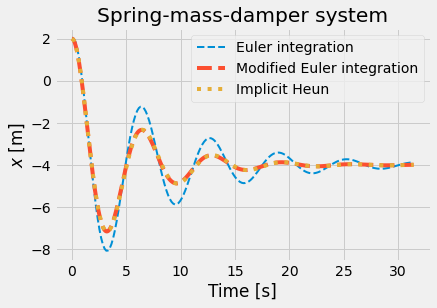

In [20]:
# plot solution with Euler's method
fig = plt.figure(figsize=(6,4))

plt.plot(t, num_solEUL[:, 0], linewidth=2, linestyle='--', label='Euler integration')
plt.plot(tee,num_solRK2[:,0],'--', label='Modified Euler integration')
plt.plot(t,num_heun[:,0],':',label='Implicit Heun')
# plt.plot(t, x_an, linewidth=1, linestyle='-', label='Analytical solution')
plt.xlabel('Time [s]')
plt.ylabel('$x$ [m]')
plt.legend(loc='best')
plt.title('Spring-mass-damper system');

## Problems [Part 3](./04_Getting_to_the_root.md)

1. One of the main benefits of a bracketing method is the stability of solutions. Open methods are not always stable. Here is an example. One way engineers and data scientists model the probability of failure is with a [sigmoid function e.g. this Challenger O-ring case study](https://byuistats.github.io/M325_Hathaway/textbook/challengerLogisticReg.html)

$$\begin{equation}
    \sigma(T) = \frac{e^{a_0-a_1 T}}{1+e^{a_0-a_1 T}}
\end{equation}$$

The Challenger explosion was a terrible incident that occurred due to the failure of an O-ring. The post-mortem data analysis showed that at low temperatures the O-rings were brittle and more likely to fail. You can use the function $\sigma(T)$ to determine the point at which there is a 50\% chance of O-ring failure. Using the pass-fail data, the two constants are

$a_0 = 15.043$

$a_1 = 0.232$

a. Plot the function $\sigma(T)$ for $T=0-100^{o}F$. Where do you see the function cross 50\% (0.5)?

b. Create two functions `f_T` and `dfdT` where `f_T`=$f(T)=\sigma(T) - 0.5$ and `dfdT`=$\frac{df}{dT}$

c. Use the `incsearch` and `newtraph` functions to find the root of f(T). When does Newton-Raphson fail to converge? Why does it fail? _Hint: if you're stuck here, take a look at this [youtube video finding an interval of convergence for the Newton-Raphson method](https://youtu.be/zyXRo8Qjj0A). Look at the animation of how the method converges and diverges._

Function crosses at 64.9 F


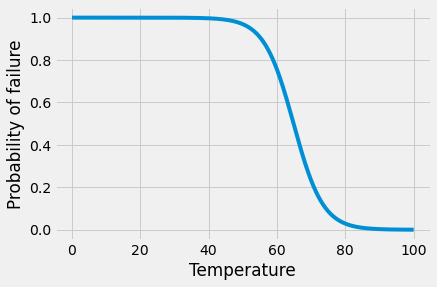

In [21]:
# 4.1A Plot the function  𝜎(𝑇)  for  𝑇=0−100𝑜𝐹 . Where do you see the function cross 50% (0.5)
temp= np.linspace(0,100,1000)
a0 = 15.043
a1 = 0.232

sigmaT = np.exp(a0-a1*temp)/(1+np.exp(a0-a1*temp))

plt.plot(temp, sigmaT)
plt.xlabel('Temperature')
plt.ylabel('Probability of failure')

data = np.column_stack((temp,sigmaT))

cross = data[np.logical_and(data[:,1]>0.49, data[:,1]<0.51) ]
temp50 = np.mean(cross[:,0])
print('Function crosses at {:2.1f} F' .format(temp50))

In [22]:
# 4.1.b Create two functions f_T and dfdT where f_T= 𝑓(𝑇)=𝜎(𝑇)−0.5  and df/dT= 𝑑𝑓/𝑑𝑇

def f_T(temp, a0 = 15.043, a1 = 0.232):
    return np.exp(a0-a1*temp)/(1+np.exp(a0-a1*temp))-0.5

def dfdt(temp, a0 = 15.043, a1 = 0.232):
    return -(a1*np.exp(a1*temp+a0))/(np.exp(a1*temp)+np.exp(a0))**2

Temperature is: 65.92405204637478


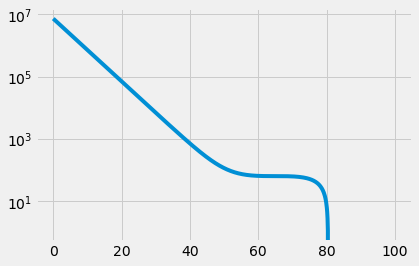

In [23]:
# 4.1C Use the incsearch and newtraph functions to find the root of f(T)

# Newton rapgod 
Tguess = 60
deltaT= -f_T(Tguess)/dfdt(Tguess)
newtemp= Tguess+deltaT
print('Temperature is:',newtemp)

tCon = np.zeros(len(temp))
for i in range(len(temp)):
    Tguess = temp[i]
    deltaT= -f_T(Tguess)/dfdt(Tguess)
    tCon[i]= Tguess+deltaT

plt.semilogy(temp, tCon);


Newton converges when the guess is close to the real value. it does not converge when the guess is far from the actual solution

In [24]:
# insearch
def incsearch(func,xmin,xmax,ns=50):
    '''incsearch: incremental search root locator
    xb = incsearch(func,xmin,xmax,ns):
      finds brackets of x that contain sign changes
      of a function on an interval
    arguments:
    ---------
    func = name of function
    xmin, xmax = endpoints of interval
    ns = number of subintervals (default = 50)
    returns:
    ---------
    xb(k,1) is the lower bound of the kth sign change
    xb(k,2) is the upper bound of the kth sign change
    If no brackets found, xb = [].'''
    x = np.linspace(xmin,xmax,ns)
    f = func(x)
    sign_f = np.sign(f)
    delta_sign_f = sign_f[1:]-sign_f[0:-1]
    i_zeros = np.nonzero(delta_sign_f!=0)
    nb = len(i_zeros[0])
    xb = np.block([[ x[i_zeros[0]+1]],[x[i_zeros[0]] ]] )

    
    if nb==0:
      print('no brackets found\n')
      print('check interval or increase ns\n')
    else:
      print('number of brackets:  {}\n'.format(nb))
    return xb

poo = incsearch(f_T, 60, 80)
print('Upper bound on temp = {:.2f} F'.format(*poo[0,:]))
print('Lower bound on temp = {:.2f} F'.format(*poo[1,:]))

number of brackets:  1

Upper bound on temp = 64.90 F
Lower bound on temp = 64.49 F


2. In the [Shooting Method
   example](https://cooperrc.github.io/computational-mechanics/module_03/04_Getting_to_the_root.html#shooting-method), you determined the initial velocity after the first
   bounce by specifying the beginning y(0) and end y(T) for an object
   subject to gravity and drag. Repeat this analysis for the time period
   just after the second bounce and just before the third bounce. The
   indices are given below for t[1430:2051] = 1.43-2.05 seconds.

    a. What is the velocity just after the second bounce?

    b. What is the coefficient of restitution for the second bounce? _Hint: use the ratio of the last velocity from above to the initial velocity calculated here._

velocity after secod bounce: 3.243782871133482 m/s


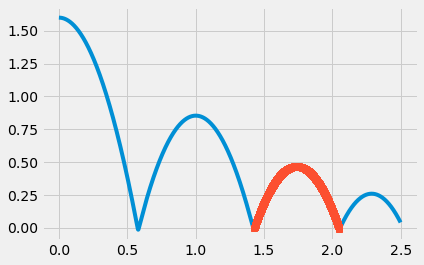

In [25]:
# 4.2A
filename = '../data/fallingtennisball02.txt'
t, y = np.loadtxt(filename, usecols=[0,1], unpack=True)
i0=1430
ie=2051

plt.plot(t,y)
plt.plot(t[i0:ie],y[i0:ie],'s')

filename = '../data/fallingtennisball02.txt'
t, y = np.loadtxt(filename, usecols=[0,1], unpack=True)
tbounce = t[580:1425]
ybounce = y[580:1425]

vy= np.diff(ybounce)/np.diff(tbounce)
print('velocity after secod bounce:', vy[2], 'm/s')

In [26]:
# 4.2B
vy0 = np.diff(y[500:578])/np.diff(t[500:578])

e2 = -vy[2]/vy0.max()
print('coefficient of restitution:',e2)

coefficient of restitution: 0.7042927485420403
